First few rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimete

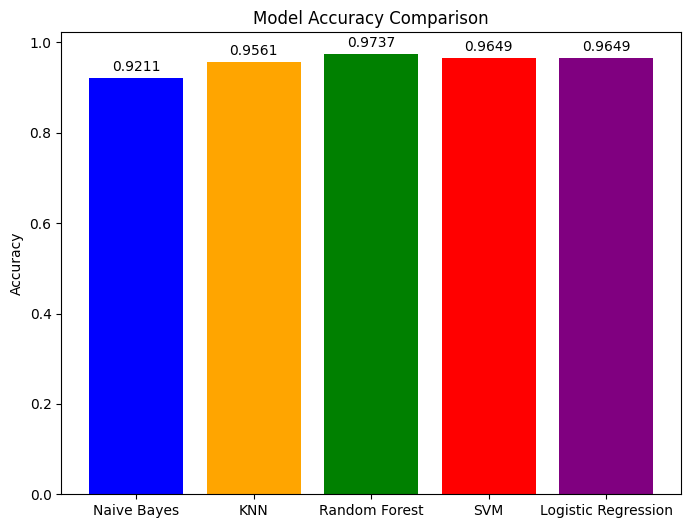

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC  # Importing Support Vector Machine
from sklearn.linear_model import LogisticRegression  # Importing Logistic Regression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("data (1).csv")

# Display first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Data preprocessing with categorical handling
def preprocess_data(data):
    # Drop unnecessary columns
    data = data.drop(columns=["id", "Unnamed: 32"], errors="ignore")
    
    # Identify categorical columns
    categorical_cols = data.select_dtypes(include=["object"]).columns
    
    # Apply Label Encoding for binary categorical columns (e.g., 'diagnosis')
    le = LabelEncoder()
    for col in categorical_cols:
        if data[col].nunique() == 2:  # Binary categories
            data[col] = le.fit_transform(data[col])
        else:
            # For non-binary categories, use One-Hot Encoding
            data = pd.get_dummies(data, columns=[col], drop_first=True)
    
    return data

# Apply preprocessing to dataset
data = preprocess_data(data)

# Display first few rows after preprocessing
print("Data after preprocessing:")
print(data.head())

# Split features and target
X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),  # Adding SVM
    "Logistic Regression": LogisticRegression(random_state=42)  # Adding Logistic Regression
}

# Evaluate models
results = {}
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Store results
    results[name] = {"accuracy": accuracy, "confusion_matrix": cm, "report": report}

    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(report)

# Compare accuracies
accuracies = [results[model]["accuracy"] for model in models]
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(models.keys(), accuracies, color=["blue", "orange", "green", "red", "purple"])
ax.set_title("Model Accuracy Comparison")
ax.set_ylabel("Accuracy")

# Annotate each bar with its corresponding accuracy value
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom')

plt.show()


In [3]:
# Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv("data (1).csv")

# Display first few rows of the dataset (before preprocessing)
print("First few rows of the dataset (before preprocessing):")
data.head()

# Data preprocessing with categorical handling
def preprocess_data(data):
    # Drop unnecessary columns (e.g., 'id' and 'Unnamed: 32')
    data = data.drop(columns=["id", "Unnamed: 32"], errors="ignore")
    
    # Identify categorical columns
    categorical_cols = data.select_dtypes(include=["object"]).columns
    
    # Apply Label Encoding for binary categorical columns (e.g., 'diagnosis')
    le = LabelEncoder()
    for col in categorical_cols:
        if data[col].nunique() == 2:  # Binary categories
            data[col] = le.fit_transform(data[col])
        else:
            # For non-binary categories, use One-Hot Encoding
            data = pd.get_dummies(data, columns=[col], drop_first=True)
    
    return data

# Apply preprocessing to dataset
data_preprocessed = preprocess_data(data)

# Display first few rows after preprocessing
print("\nData after preprocessing:")
data_preprocessed.head(596)


First few rows of the dataset (before preprocessing):

Data after preprocessing:


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


First few rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimete

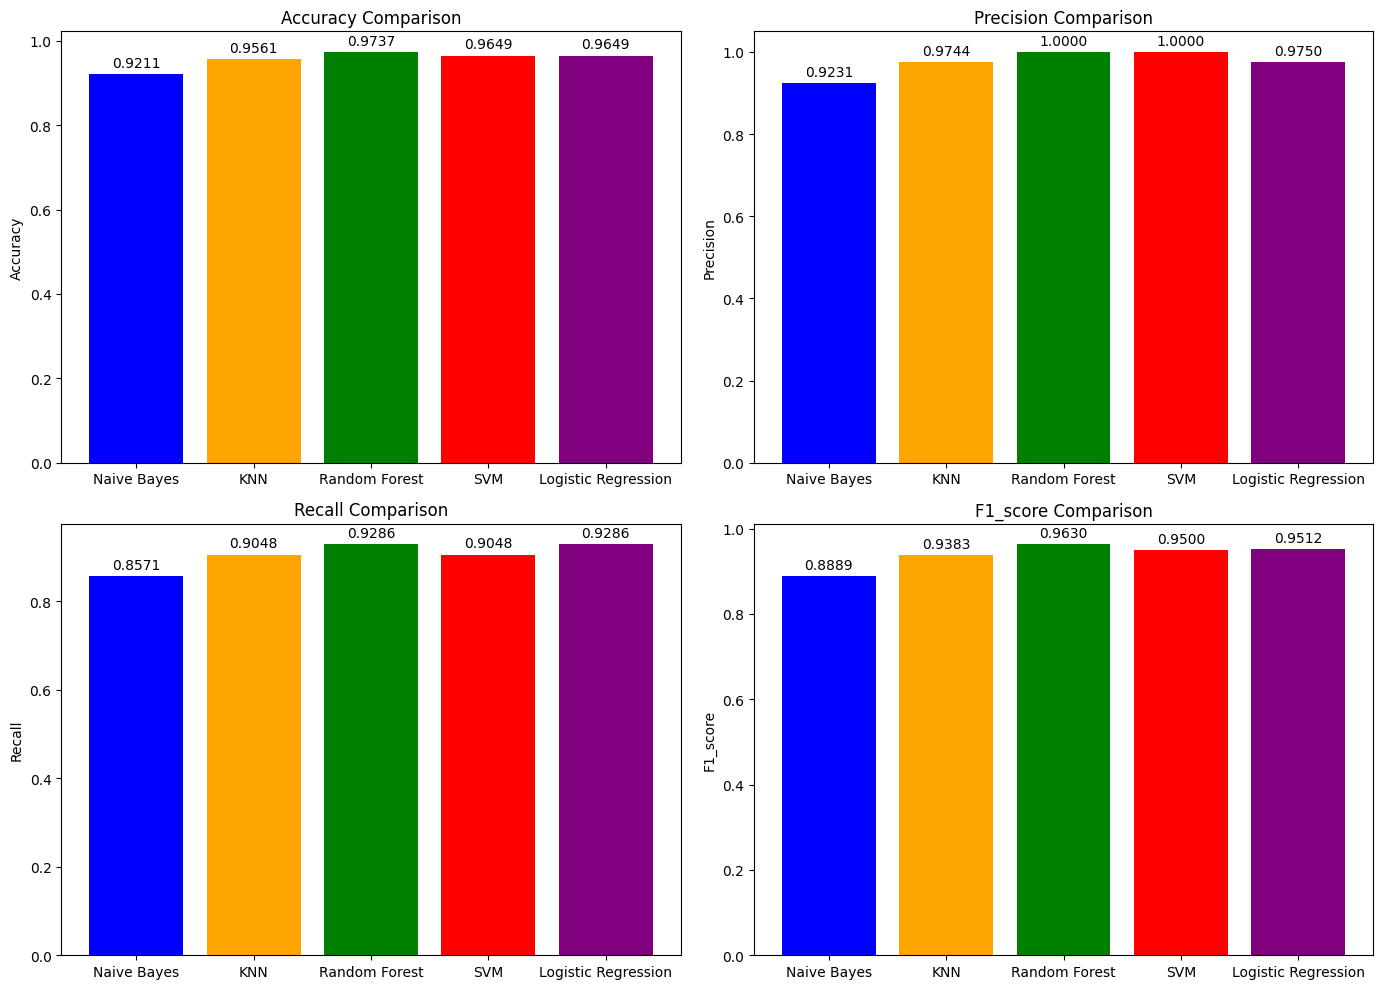

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC  # Importing Support Vector Machine
from sklearn.linear_model import LogisticRegression  # Importing Logistic Regression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("data (1).csv")

# Display first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Data preprocessing with categorical handling
def preprocess_data(data):
    # Drop unnecessary columns
    data = data.drop(columns=["id", "Unnamed: 32"], errors="ignore")
    
    # Identify categorical columns
    categorical_cols = data.select_dtypes(include=["object"]).columns
    
    # Apply Label Encoding for binary categorical columns (e.g., 'diagnosis')
    le = LabelEncoder()
    for col in categorical_cols:
        if data[col].nunique() == 2:  # Binary categories
            data[col] = le.fit_transform(data[col])
        else:
            # For non-binary categories, use One-Hot Encoding
            data = pd.get_dummies(data, columns=[col], drop_first=True)
    
    return data

# Apply preprocessing to dataset
data = preprocess_data(data)

# Display first few rows after preprocessing
print("Data after preprocessing:")
print(data.head())

# Split features and target
X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models (adding SVM and Logistic Regression)
models = {
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),  # Adding SVM
    "Logistic Regression": LogisticRegression(random_state=42)  # Adding Logistic Regression
}

# Evaluate models
results = {}
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Store results
    results[name] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "confusion_matrix": cm,
        "report": report
    }

    # Display results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(report)

# Plot each metric in a single figure with subplots
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Create a 2x2 grid of subplots
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Plot each metric
for idx, metric in enumerate(metrics):
    values = [results[model][metric] for model in models]
    bars = axes[idx].bar(models.keys(), values, color=['blue', 'orange', 'green', 'red', 'purple'])
    axes[idx].set_title(f"{metric.capitalize()} Comparison")
    axes[idx].set_ylabel(metric.capitalize())
    
    # Annotate each bar with its corresponding value
    for bar in bars:
        yval = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()  # Show the combined plot


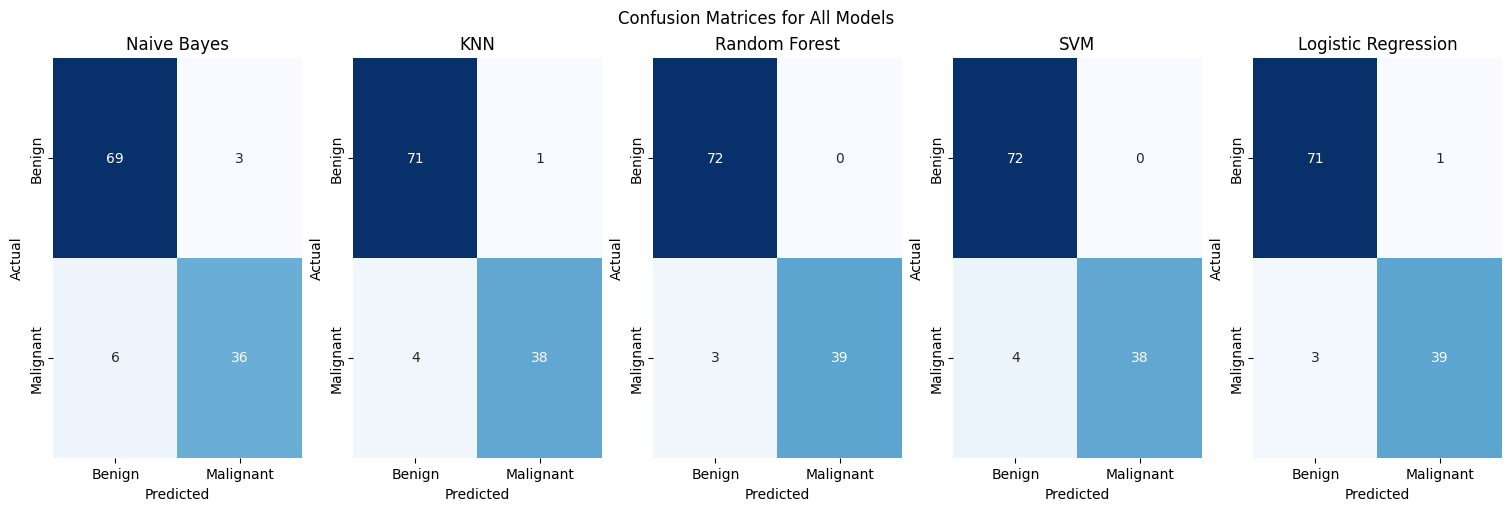

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC  # Importing Support Vector Machine
from sklearn.linear_model import LogisticRegression  # Importing Logistic Regression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for heatmap

# Load dataset
data = pd.read_csv("data (1).csv")

# Data preprocessing with categorical handling
def preprocess_data(data):
    data = data.drop(columns=["id", "Unnamed: 32"], errors="ignore")
    categorical_cols = data.select_dtypes(include=["object"]).columns
    le = LabelEncoder()
    for col in categorical_cols:
        if data[col].nunique() == 2:  
            data[col] = le.fit_transform(data[col])
        else:
            data = pd.get_dummies(data, columns=[col], drop_first=True)
    return data

data = preprocess_data(data)

X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42)
}

# Evaluate models
results = {}
confusion_matrices = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append((name, cm))

# Plot all confusion matrices in a single figure
fig, axes = plt.subplots(1, len(models), figsize=(15, 5), constrained_layout=True)

for ax, (name, cm) in zip(axes, confusion_matrices):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax,
                xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.suptitle("Confusion Matrices for All Models")
plt.show()


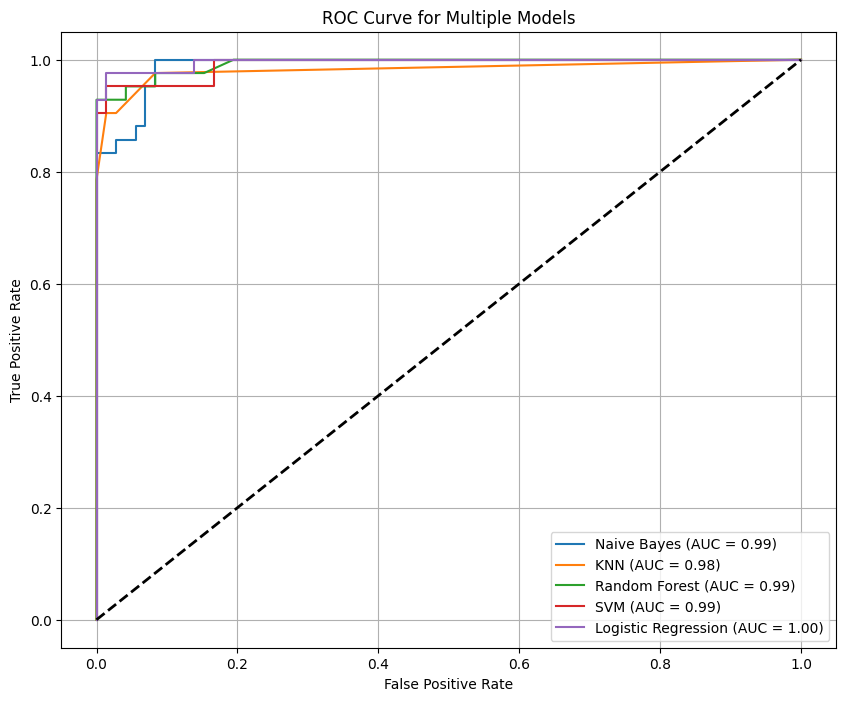

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("data (1).csv")

# Data preprocessing
def preprocess_data(data):
    data = data.drop(columns=["id", "Unnamed: 32"], errors="ignore")
    categorical_cols = data.select_dtypes(include=["object"]).columns
    le = LabelEncoder()
    for col in categorical_cols:
        if data[col].nunique() == 2:
            data[col] = le.fit_transform(data[col])
        else:
            data = pd.get_dummies(data, columns=[col], drop_first=True)
    return data

data = preprocess_data(data)

# Splitting data
X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),  # SVM with probability=True
    "Logistic Regression": LogisticRegression(random_state=42)
}

# Plot ROC Curve
plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Get probabilities for ROC (use predict_proba or decision_function)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_prob = model.decision_function(X_test)
    else:
        continue  # Skip if model does not support these methods
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot the diagonal line (random guess)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Customize plot
plt.title("ROC Curve for Multiple Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()
